# Transcripts

In [1]:
from collections import Counter

import networkx as nx
import nltk
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag

## Loading data

In [2]:
transcripts_df = pd.read_csv(
    'data/out/transcripts_1.csv',
    converters={'INTERVIEWERS': eval, 'INTERVIEWEES': eval, 'ALIASES': eval, 'INTERVIEW': eval},
)
transcripts_df = transcripts_df[['ID', 'INTERVIEWERS', 'INTERVIEWEES', 'ALIASES', 'INTERVIEW']]

In [3]:
transcripts_df.head()

,ID,INTERVIEWERS,INTERVIEWEES,ALIASES,INTERVIEW
0,Aimee Johnson – 17 September 2010,[Rick Fehr],[Aimee Johnson],[],"[(0, Rick, Ok. We’re recording now, I’m sitti..."
1,Andrew Adult Male – 18 September 2010,[Dave White],[Andrew Peters],[],"[(0, Dave, So we’d like to ask you about thing..."
2,Anita Smith -,[Dave White],[Anita Smith],[],"[(0, Dave, How did we use to use the environme..."
3,Apollo Blackeagle – 27 October 2010,"[Rick Fehr, David White]",[Apollo Blackeagle],[],"[(0, Rick, Ok, its October 27th I believe, we’..."
4,Bill Sands,[Dave White],[Bill Sands],[],"[(0, Dave, In the past, there’s concern today ..."


In [4]:
transcripts_df.shape

(68, 5)

In [5]:
transcripts_df.head()

,ID,INTERVIEWERS,INTERVIEWEES,ALIASES,INTERVIEW
0,Aimee Johnson – 17 September 2010,[Rick Fehr],[Aimee Johnson],[],"[(0, Rick, Ok. We’re recording now, I’m sitti..."
1,Andrew Adult Male – 18 September 2010,[Dave White],[Andrew Peters],[],"[(0, Dave, So we’d like to ask you about thing..."
2,Anita Smith -,[Dave White],[Anita Smith],[],"[(0, Dave, How did we use to use the environme..."
3,Apollo Blackeagle – 27 October 2010,"[Rick Fehr, David White]",[Apollo Blackeagle],[],"[(0, Rick, Ok, its October 27th I believe, we’..."
4,Bill Sands,[Dave White],[Bill Sands],[],"[(0, Dave, In the past, there’s concern today ..."


## Processing data

In [6]:
all_text = '\n'.join([text for interview in transcripts_df.INTERVIEW for (index, name, text) in interview])

In [7]:
with open('data/out/all_text.txt', 'w') as f:
    f.write(all_text)

### Keywords

#### All

In [8]:
def clean_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    words = [token for token in tokens if token not in stopwords.words('english') and len(token) > 1]
    text = ' '.join(words)
    return text

In [9]:
%%time

cleaned_all_text = clean_text(all_text)

CPU times: user 1min 13s, sys: 5.08 s, total: 1min 18s
Wall time: 1min 18s


In [10]:
all_words = cleaned_all_text.split()

In [11]:
counter_all = Counter(all_words)

In [12]:
counter_all.most_common(20)

[('like', 2817),
 ('would', 2627),
 ('know', 2450),
 ('yea', 2440),
 ('people', 1995),
 ('yeah', 1924),
 ('go', 1883),
 ('used', 1824),
 ('re', 1735),
 ('one', 1702),
 ('remember', 1549),
 ('get', 1545),
 ('time', 1537),
 ('uh', 1517),
 ('think', 1465),
 ('things', 1404),
 ('well', 1390),
 ('back', 1364),
 ('got', 1273),
 ('going', 1250)]

#### By POS tags

In [13]:
%%time

tagged_all_text = pos_tag(word_tokenize(all_text))

CPU times: user 39.5 s, sys: 64 ms, total: 39.6 s
Wall time: 39.6 s


##### Adjectives

In [14]:
adjectives = [word for word, pos in tagged_all_text if len(word) > 1 and pos.startswith('J')]

In [15]:
counter_adjs = Counter(adjectives)

In [16]:
counter_adjs.most_common(20)

[('other', 976),
 ('re', 838),
 ('good', 785),
 ('little', 571),
 ('big', 553),
 ('uh', 550),
 ('old', 462),
 ('more', 435),
 ('different', 382),
 ('same', 330),
 ('ll', 327),
 ('much', 322),
 ('many', 307),
 ('whole', 272),
 ('um', 272),
 ('ve', 260),
 ('long', 243),
 ('own', 232),
 ('right', 217),
 ('first', 193)]

##### Nouns

In [17]:
nouns = [word for word, pos in tagged_all_text if len(word) > 1 and pos.startswith('N')]

In [18]:
counter_nouns = Counter(nouns)

In [19]:
counter_nouns.most_common(20)

[('people', 1919),
 ('time', 1535),
 ('things', 1397),
 ('Yea', 1200),
 ('way', 1199),
 ('lot', 1182),
 ('hmm', 1046),
 ('something', 910),
 ('thing', 787),
 ('community', 684),
 ('water', 667),
 ('kind', 591),
 ('stuff', 590),
 ('yea', 534),
 ('today', 463),
 ('Well', 459),
 ('area', 450),
 ('Dave', 429),
 ('years', 424),
 ('anything', 418)]

##### Verbs

In [20]:
verbs = [word for word, pos in tagged_all_text if len(word) > 1 and pos.startswith('V')]

In [21]:
counter_verbs = Counter(verbs)

In [22]:
counter_verbs.most_common(20)

[('was', 6131),
 ('have', 3258),
 ('is', 2699),
 ('be', 2587),
 ('had', 2480),
 ('know', 2418),
 ('were', 2391),
 ('do', 2096),
 ('go', 1852),
 ('used', 1813),
 ('don', 1759),
 ('remember', 1489),
 ('get', 1431),
 ('are', 1420),
 ('think', 1420),
 ('got', 1256),
 ('going', 1237),
 ('did', 918),
 ('see', 858),
 ('say', 844)]

### People

In [55]:
def first_names(names):
    return [x.split()[0] for x in names]

In [56]:
interviewees = list(set(y for x in transcripts_df.INTERVIEWEES for y in x))

In [57]:
interviewees_first_names = first_names(interviewees)

In [58]:
aliases = list(set(z for x in transcripts_df.ALIASES for y in x for z in y))

In [59]:
all_names = set(interviewees + interviewees_first_names + aliases)

In [77]:
all_names

{'Aimee',
 'Aimee Johnson',
 'Andrew',
 'Andrew Peters',
 'Anita',
 'Anita Smith',
 'Apollo',
 'Apollo Blackeagle',
 'Archie',
 'Becky',
 'Bill',
 'Bill Sands',
 'Brenda',
 'Brenda Wheat',
 'Cal',
 'Cameron',
 'Carl',
 'Carl Smith (Resource Protection Officer)',
 'Carmen',
 'Carmen Wrightman',
 'Carrie',
 'Carrie Isaac',
 'Charles',
 'Charles Wright',
 'Cheryl',
 'Chief',
 'Chief Gilbert',
 'Chief Joseph Gilbert',
 'Chris',
 'Chris Riley',
 'Daniel',
 'Darren',
 'Dean',
 'Dean Jacobs',
 'Dot',
 'Dot Peters',
 'Doug',
 'Doug (Resource Protection Officer)',
 'Elaine',
 'Elaine Jacobs',
 'Eli',
 'Eli Baxter',
 'Eliza',
 'Eliza John',
 'Eric',
 'Eric Isaac',
 'Frank',
 'Georgina',
 'Greg',
 'Greg Isaac',
 'Gus',
 'Harold',
 'Harold Peters',
 'Isabelle',
 'Jane',
 'Jane Jacobs',
 'Jasper',
 'Jasper John',
 'Jean',
 'Jean Wrightman',
 'Jen',
 'Jennie',
 'Jennie Blackbird',
 'Jerome',
 'Jerry',
 'Jessica',
 'Joanne',
 'Joanne Day',
 'Joe',
 'Joe Isaac',
 'John',
 'Julia',
 'Karen',
 'Karen La

In [75]:
%%time

grammar = 'PROPER_NOUN: {<NNP>+}'
cp = nltk.RegexpParser(grammar)

g = nx.DiGraph()

interviewers_names = ['Dave', 'Rick', 'Clint']
for interview in transcripts_df.INTERVIEW:
    for index, name, text in interview:
        if text:
            if name not in interviewers_names:
                if not g.has_node(name):
                    g.add_node(name)
                tagged_text = pos_tag(word_tokenize(text))
                parsed_text = cp.parse(tagged_text)
                for e in parsed_text:
                    if isinstance(e, nltk.tree.Tree) and e.label() == 'PROPER_NOUN':
                        names = [word for word, tag in e if word in all_names]
                        if names:
                            proper_noun = ' '.join(names)
                            if not g.has_edge(name, proper_noun):
                                g.add_edge(name, proper_noun, weight=0)
                            g[name][proper_noun]['weight'] += 1

CPU times: user 29.8 s, sys: 48 ms, total: 29.8 s
Wall time: 29.8 s


In [76]:
nx.write_gexf(g, 'data/out/graph.gexf')

In [80]:
transcripts_df.loc[0, 'INTERVIEW'] Poner el nombre del interviewer y : delante de la parrafada

[(0,
  'Rick',
  'Ok.  We’re recording now, I’m sitting with Aimee Johnson, and what we’ll be talking about today is the customary law project that you were involved with when you worked at the Heritage Centre, but attached to that as I was explaining yesterday, is a very similar theme, and that is direction for environmental policy in the future based on your concerns and any knowledge or foresight or thoughts you might have to better shape what’s going to happen in the future, all right?'),
 (1, 'Aimee Johnson', 'Ok.'),
 (2,
  'Rick',
  'Ok, so first of all we’ve had discussions on this before, and you already have a considerable of thought on traditions, customs that connected Anishinaabeg to the territory, to the lands and to the waters.  What are some of, from you experience, and from your knowledge of how people related to the territory in a positive way, in a way that was enriching, what are some of those ways, I guess… that was a messed up question.'),
 (3, 'Aimee Johnson', '(L

In [78]:
sentence = [("the", "DT"), ("little", "NNP"), ("yellow", "NNP"), ("dog", "NNP"), ("barked", "VBD"), ("at", "NNP"),  ("the", "DT"), ("cat", "NN")]
grammar = 'PROPER_NOUN: {<NNP>+}'
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence)

In [79]:
for x in result:
    print(x)

('the', 'DT')
(PROPER_NOUN little/NNP yellow/NNP dog/NNP)
('barked', 'VBD')
(PROPER_NOUN at/NNP)
('the', 'DT')
('cat', 'NN')


In [47]:
for x in result:
    if isinstance(x, nltk.tree.Tree):
        for y in x:
            print(y)
        break

('little', 'NNP')
('yellow', 'NNP')
('dog', 'NNP')


In [49]:
x.label()

'PROPER_NOUN'

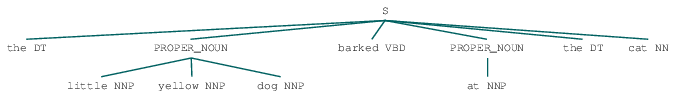

In [75]:
result

In [34]:
proper_nouns = [word for word, pos in tagged_all_text if len(word) > 1 and pos == 'NNP']

In [36]:
mentioned_proper_nouns = all_names.intersection(proper_nouns)

In [37]:
mentioned_proper_nouns

{'Aimee',
 'Andrew',
 'Anita',
 'Apollo',
 'Archie',
 'Becky',
 'Bill',
 'Brenda',
 'Cal',
 'Cameron',
 'Carl',
 'Carmen',
 'Carrie',
 'Charles',
 'Chief',
 'Chris',
 'Daniel',
 'Dean',
 'Dot',
 'Doug',
 'Elaine',
 'Eli',
 'Eliza',
 'Eric',
 'Frank',
 'Georgina',
 'Greg',
 'Harold',
 'Isabelle',
 'Jane',
 'Jasper',
 'Jean',
 'Jen',
 'Jerry',
 'Jessica',
 'Joe',
 'John',
 'Julia',
 'Karen',
 'Kenneth',
 'Kennon',
 'Kevin',
 'Lee',
 'Linda',
 'Liz',
 'Lloyd',
 'Lois',
 'Lyndsay',
 'Mark',
 'Mickey',
 'Morris',
 'Myrna',
 'Naomi',
 'PD',
 'Pat',
 'Patricia',
 'Patty',
 'Paul',
 'Rachel',
 'Ralph',
 'Rita',
 'Ron',
 'Rose',
 'Sarah',
 'Stanley',
 'Stuart',
 'Suzie',
 'Terry',
 'Tom',
 'Vernon',
 'Woman'}

In [33]:
qqq='hola me llamo antonio jimenez mavillard'

In [34]:
qqq.find('antonio')

14

In [35]:
qqq.find('aantonio')

-1

In [36]:
qqq.index('antonio')

14

In [37]:
qqq.index('aantonio')

ValueError: substring not found

## Saving data

In [ ]:
# transcripts_df.to_csv('data/out/transcripts_2.csv', index=False)